Total unique words: 1787
Unique words representing half of the total words: 108


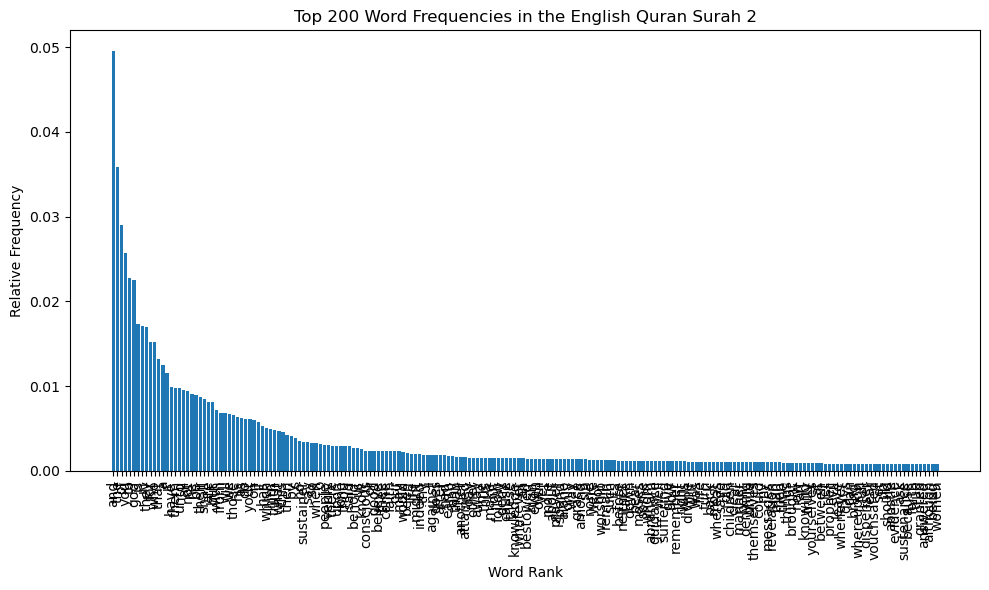

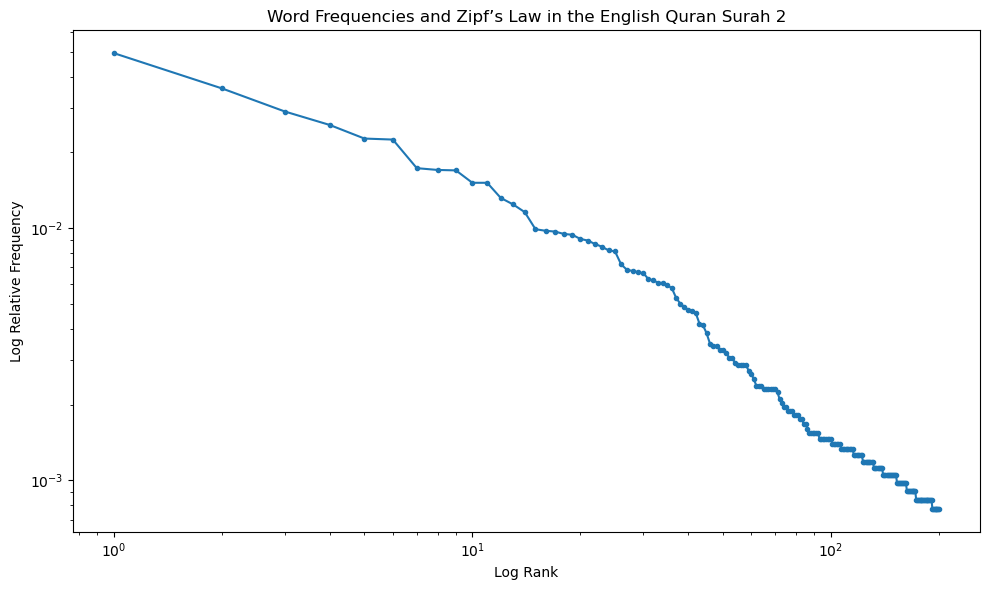

In [1]:
import requests
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Fetch the Quran text in English translation by Asad

url = "https://api.alquran.cloud/v1/surah/2/en.asad"
response = requests.get(url)
data = response.json()

# Extract all verses into a single text

quran_text = ' '.join(ayah['text'] for ayah in data['data']['ayahs'])

# Step 2: Count unique words
words = re.findall(r'\b\w+\b', quran_text.lower())
unique_words = Counter(words)
total_unique_words = len(unique_words)

# Display total unique words
print(f"Total unique words: {total_unique_words}")

# Step 3: Words representing half of the total words
total_words = sum(unique_words.values())
half_total_words = total_words / 2
cumulative_words = 0
unique_words_for_half = 0
for word, count in unique_words.items():
    cumulative_words += count
    unique_words_for_half += 1
    if cumulative_words >= half_total_words:
        break

# Display the number of unique words representing half of the total words
print(f"Unique words representing half of the total words: {unique_words_for_half}")

# Step 4: Top 200 words
top_200_words = unique_words.most_common(200)

#print(top_200_words)

# Step 5: Graph of relative frequencies
words, frequencies = zip(*top_200_words)
relative_frequencies = [freq / total_words for freq in frequencies]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_200_words)), relative_frequencies)
plt.xlabel('Word Rank')
plt.ylabel('Relative Frequency')
plt.title('Top 200 Word Frequencies in the English Quran Surah 2')
plt.xticks(range(len(top_200_words)), words, rotation='vertical')
plt.tight_layout()
plt.show()

# Step 6: Zipf's law analysis
ranks = np.arange(1, len(relative_frequencies) + 1)
plt.figure(figsize=(10, 6))
plt.loglog(ranks, relative_frequencies, marker='.')
plt.title("Word Frequencies and Zipf’s Law in the English Quran Surah 2")
plt.xlabel('Log Rank')
plt.ylabel('Log Relative Frequency')
plt.tight_layout()
plt.show()



### 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

Based on the analysis, the distribution of word frequencies in this corpus aligns with Zipf's Law. For instance, the most frequent word 'and' appears 709 times, while the second ('the') appears 514 times, and the third ('of') 416 times, demonstrating a pattern where each word's frequency is inversely proportional to its rank. This trend, where the nth most common word appears about 1/n times as often as the most common word, is characteristic of Zipf's Law and is observed in this corpus.

### 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

The frequency distribution of words in this specific corpus is shaped by its religious and literary context, likely exhibiting a more limited and repetitive vocabulary focused on key themes and terms, such as 'God', 'believe', and 'truth'. In a broader
